In [1]:
!pip install scProject -U
import random
random.seed(a=613)
import numpy as np
import scProject
import scanpy as sc
import os

patternNum = 39
if not os.path.exists('latentspace'+str(patternNum)):
    os.mkdir('latentspace'+str(patternNum))

dataset = sc.read('/home/abaraban/conda_env/humanRetinaData/humanRetinaDataset.h5ad')
dnorm = np.linalg.norm(dataset.X, axis=1, ord=1, keepdims=True)
dnormalized = dataset.X / (dnorm * .001)
dataset.X = dnormalized
patterns= sc.read('retina_patterns.h5ad')

scProject.matcher.orthologMapper(dataset, 'gene_map.csv', 'Gene stable ID','Mouse gene stable ID', 'id')
dataset_filtered, patterns_filtered = scProject.matcher.filterAnnDatas(dataset, patterns, 'id')

import matplotlib.pyplot as plt
from sklearn import linear_model
plt.rcParams['figure.figsize']= [10, 12]
dataset_filtered = scProject.matcher.logTransform(dataset_filtered)

scProject.rg.NNLR_ElasticNet(dataset_filtered, patterns_filtered, 'H01', .0001, .01, layer='log', iterations=100000)

scProject.viz.pearsonMatrix(dataset_filtered, patterns_filtered, 'umap2_CellType',
                            11, 'H01','H01Pears', plot=True, display=False,
                            path='/home/abaraban/conda_env/latentspace'+ str(patternNum) + '/pearsmat.png',
                            xtickSize=6, ytickSize=5, row_cluster=True, col_cluster=True)



Requirement already up-to-date: scProject in /home/abaraban/anaconda3/envs/scProjections/lib/python3.7/site-packages (1.0.9.8997)
(118555, 2412) dataset filter shape
(80, 2412) patterns filter shape


Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.


A layer named 'log' has been added to your filtered dataset
Regressing on loglayer of dataset_filtered
(118555, 80)
['RPCs', 'Retinal Ganglion Cells', 'Neurogenic Cells', 'Cones', 'AC/HC_Precurs', ..., 'Horizontal Cells', 'Amacrine Cells', 'Bipolar Cells', 'Rods', 'Muller Glia']
Length: 11
Categories (11, object): ['RPCs', 'Retinal Ganglion Cells', 'Neurogenic Cells', 'Cones', ..., 'Amacrine Cells', 'Bipolar Cells', 'Rods', 'Muller Glia']


In [2]:
scProject.viz.UMAP_Projection(dataset_filtered, 'umap2_CellType', 'H01', 'H01UMAP', 50, plot=False)

In [3]:
plt.rcParams['figure.figsize']= [12, 10]
scProject.viz.UMAP_Viz(dataset_filtered, 'H01UMAP', 'umap2_CellType', pointSize=.01,
                        path="/home/abaraban/conda_env/latentspace"+ str(patternNum) + "/"+str(patternNum)+"UMAP.pdf", display=False)

['RPCs', 'Retinal Ganglion Cells', 'Neurogenic Cells', 'Cones', 'AC/HC_Precurs', ..., 'Horizontal Cells', 'Amacrine Cells', 'Bipolar Cells', 'Rods', 'Muller Glia']
Length: 11
Categories (11, object): ['RPCs', 'Retinal Ganglion Cells', 'Neurogenic Cells', 'Cones', ..., 'Amacrine Cells', 'Bipolar Cells', 'Rods', 'Muller Glia']


In [4]:
plt.rcParams['figure.figsize']= [12, 10]
scProject.viz.featurePlots(dataset_filtered, [patternNum], 'H01', 'H01UMAP', obsColumn='umap2_CellType', pointSize=.01,
                           path="/home/abaraban/conda_env/latentspace"+ str(patternNum) + "/featurePlot", display=False, clip=99)

/home/abaraban/anaconda3/envs/scProjections/lib/python3.7/site-packages/scProject/viz.py:232: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  colors.set_under(zeroColor)


Number of nonzero cells 65022


C1 is dense
C2 is dense
(1765, 1) (1765, 3)


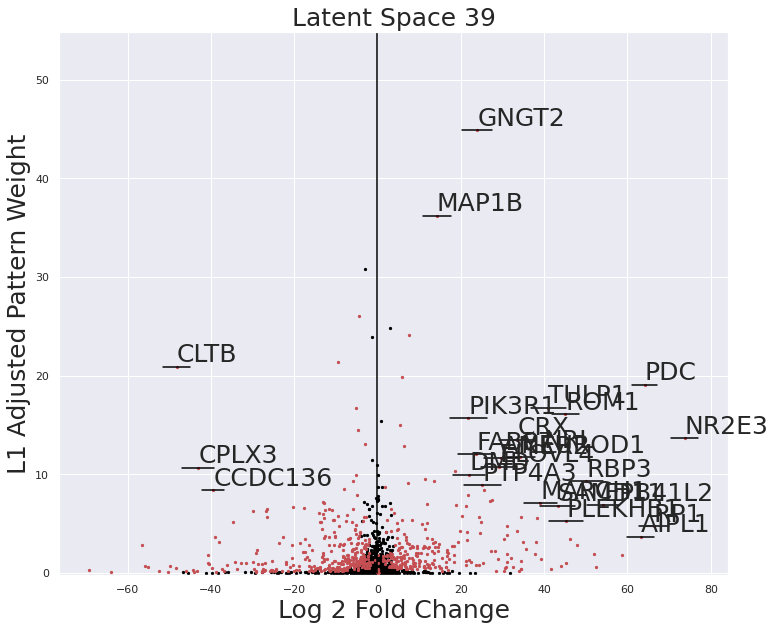

In [5]:
rods = dataset_filtered[dataset_filtered.obs['umap2_CellType'].isin(['Rods'])].copy()
bipolarCells = dataset_filtered[dataset_filtered.obs['umap2_CellType'].isin(['Bipolar Cells'])].copy()

rods.X = np.log2(rods.X + 1e-30)
bipolarCells.X = np.log2(bipolarCells.X + 1e-30)
plt.rcParams['figure.figsize']= [12, 10]

drivers = scProject.stats.projectionDriver(patterns_filtered, rods, bipolarCells, .9999999999, 'gene_short_name', patternNum, display=True,
                                          num_annotated=25, path="latentspace"+ str(patternNum) + "/WCIsRods-BP.pdf", pointSize=5)


                      
    
    

In [6]:
filtPos = drivers[0]['Low'] > 0
filtNeg = drivers[0]['Low'] < 0
for i in drivers[0][filtNeg].index:
    print(i)

CAMK1D
SYP
SYNRG
REV3L
CELF4
GABRG2
TRNP1
ETNK1
CLTC
P4HTM
GRIA2
PCP4L1
ATP2C1
SYNGR1
TTLL7
HLF
MAP4
RORA
ZNF385A
GUCY1B3
ME1
FAM126B
VSX2
SNAP25
PRKAB1
MAPRE3
RIC8B
AHDC1
HSPA12A
MTCL1
GNAO1
DUSP8
MGARP
LHFP
NDUFA4
HSPB6
SMIM8
RTN1
TEF
ITM2B
TRIB1
CHGB
NFIB
APOBEC2
LHX4
TM7SF3
MCF2L
CA10
CRMP1
MAX
PAK3
NFIC
DGKE
INPP1
OTX2
TAGLN3
KLHDC8B
GUCY1A3
NDUFAF5
TET3
NAPB
ASAP2
DNAJC12
GALNT7
GLUL
CSNK1G1
CALM1
HIST3H2A
GFPT1
TMEM145
RD3L
GDAP1
FRMD3
FAM3C
PTN
USP33
SLC4A8
ACADVL
ORMDL3
KLF9
NR1D1
OCRL
AMPH
RAPH1
ATP6V1G2
FBXL5
APLP2
PAK7
GABRB3
LPGAT1
IP6K2
TSHZ2
CCDC136
RGS16
FBXO9
RABAC1
CNRIP1
FAM229B
RAB3A
TSPYL4
ITM2C
SV2B
KCNAB1
SENP7
EDIL3
ACSL3
TNRC6C
MKNK1
NDUFS5
GPR37
CNTN1
PCP2
GLO1
TRAFD1
LMO4
SNRK
MAGI2
DPYSL2
SLC12A5
TMEM9B
DCTN1
NAPG
MT-ATP6
RYR2
SYT1
SYT4
CXXC4
DESI1
TRAK2
PCP4
RUFY3
DMXL2
CDC42EP3
ZFHX3
NSF
ADRB1
RALGAPA1
C5orf30
HOOK3
PHACTR1
NCALD
HAGH
NAV1
SMIM18
STX3
LIN7A
PCLO
CFAP97
TIMM44
TAX1BP1
ACADM
PROX1
PURA
ANK2
DNMT3A
TLE2
ZBTB4
ZNF444
CPE
TNRC6B
SV2A
SLC1A7
KIF

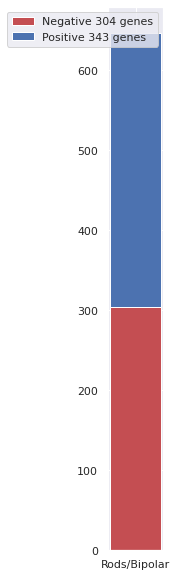

In [7]:
plt.rcParams['figure.figsize']= [1, 10]
x = ['Rods/Bipolar']
y1 = [len(drivers[0][drivers[0]['Low'] < 0].index)]
y2 = [len(drivers[0][drivers[0]['Low'] > 0].index)]
plt.bar(x, y1, color='r', label='Negative ' + str(y1[0]) + ' genes')
plt.bar(x, y2, bottom=y1, color='b', label='Positive ' + str(y2[0]) + ' genes')
plt.legend()
plt.savefig('latentspace39/stackedBarRodsBipolar.pdf', bbox_inches='tight')
plt.show()

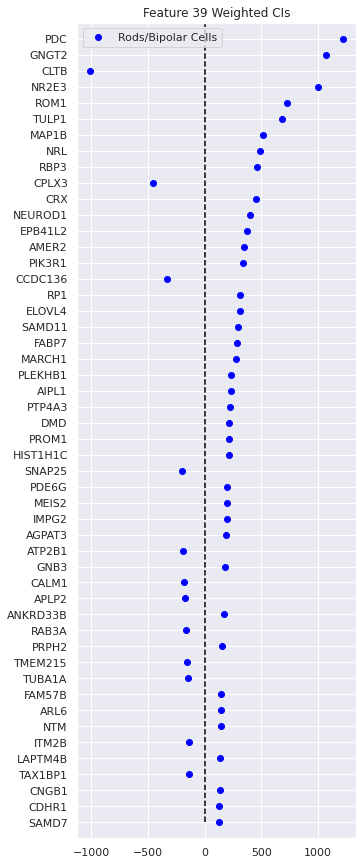

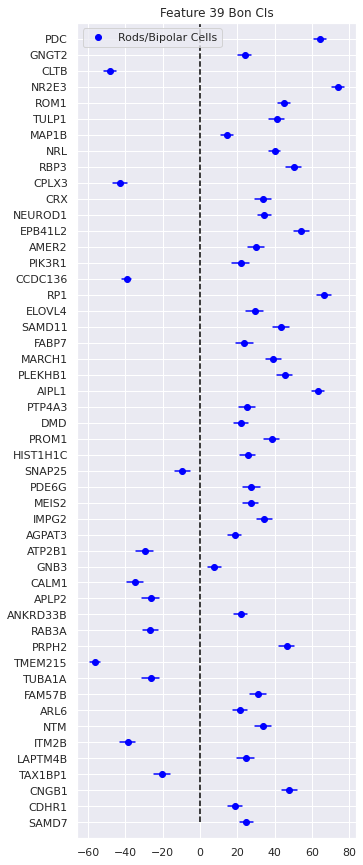

In [8]:
plt.rcParams['figure.figsize']= [5, 15]
scProject.viz.rankedByWeightedCIViz(drivers, 'Rods/Bipolar Cells', "Feature 39 Weighted CIs", "latentspace39/WCIPlot.pdf",
                                    "Feature 39 Bon CIs", "latentspace39/BCIPlot.pdf")

This subset has shape: (118555, 2412)


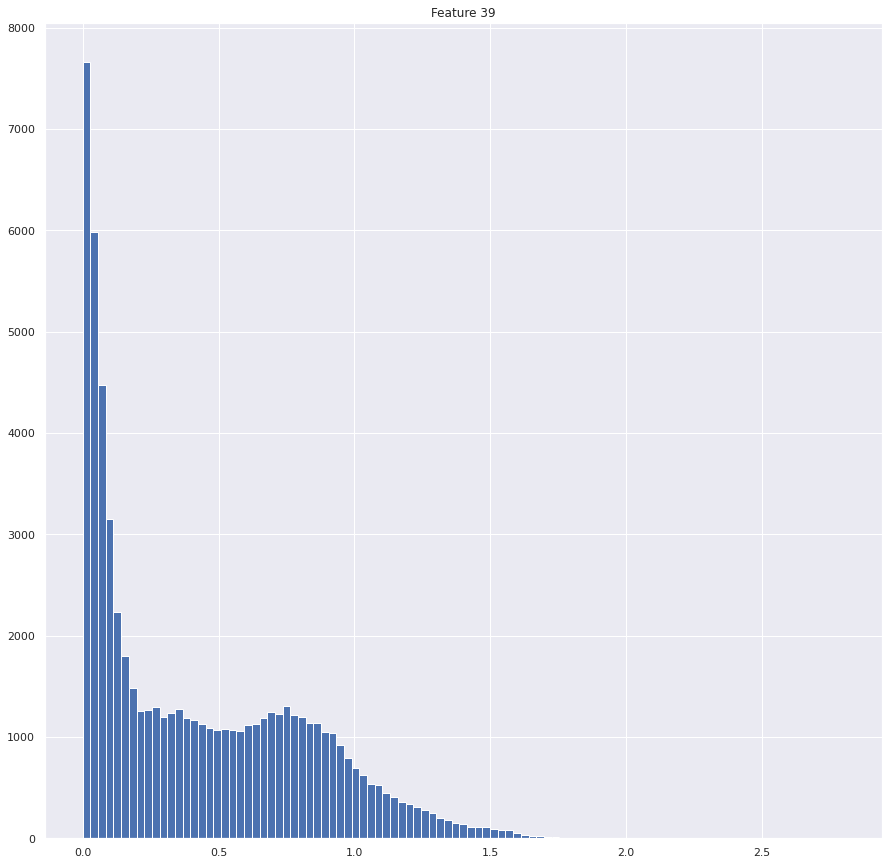

In [9]:
plt.rcParams['figure.figsize']= [15, 15]
scProject.viz.patternWeightDistribution(dataset_filtered, 'H01', [39], 'umap2_CellType',
                                        subset=dataset_filtered.obs['umap2_CellType'].unique())  



                                       

(25436, 2412)
(53533, 2412)
(118555, 2412)
C1 is dense
C2 is dense
(1644, 1) (1644, 3)


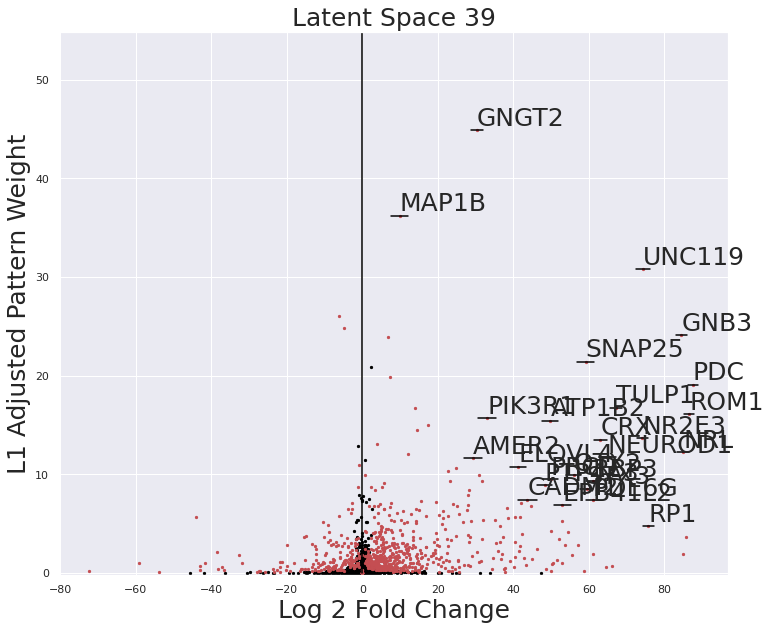

In [22]:
users = dataset_filtered[dataset_filtered.obsm['H01'][:, 38] >= .5].copy()
control = dataset_filtered[dataset_filtered.obsm['H01'][:, 38] == 0].copy()

users.X = np.log2(users.X + 1e-30)
control.X = np.log2(control.X + 1e-30)
plt.rcParams['figure.figsize']= [12, 10]

print(users.shape)
print(control.shape)
print(dataset_filtered.shape)

driversExpressControl = scProject.stats.projectionDriver(patterns_filtered, users, control, .9999999999, 'gene_short_name', patternNum, display=True,
                                          num_annotated=25, path="latentspace"+ str(patternNum) + "/WCIsExpress-Control.pdf", pointSize=5)

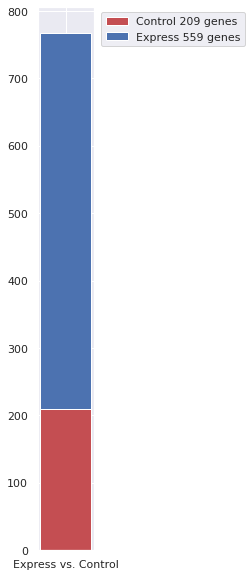

In [11]:
plt.rcParams['figure.figsize']= [1, 10]
x = ['Express vs. Control']
y1 = [len(driversExpressControl[0][driversExpressControl[0]['Low'] < 0].index)]
y2 = [len(driversExpressControl[0][driversExpressControl[0]['Low'] > 0].index)]
plt.bar(x, y1, color='r', label='Control ' + str(y1[0]) + ' genes')
plt.bar(x, y2, bottom=y1, color='b', label='Express ' + str(y2[0]) + ' genes')
plt.legend(bbox_to_anchor=(1.04,1))
plt.savefig('latentspace39/stackedEVC.pdf', bbox_inches='tight')
plt.show()


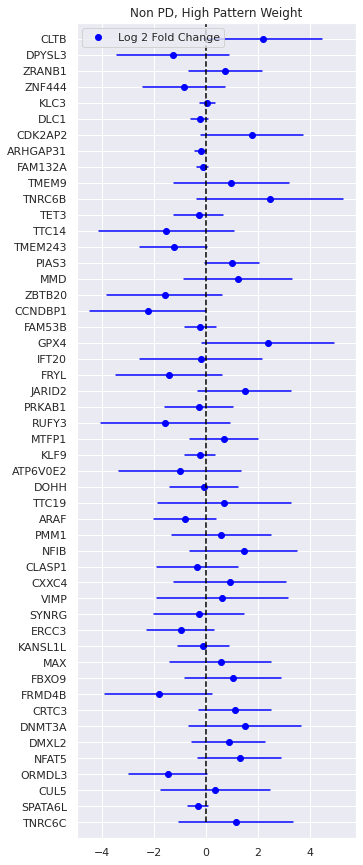

In [12]:
# Take a look at the highest pattern values that aren't PD
pdGenes = driversExpressControl[0].index
latent39 = patterns_filtered[38].copy()

curNorm = np.linalg.norm(np.reshape(latent39.X, -1), ord=1)
numNonzero = np.count_nonzero(latent39.X)
normalized = latent39.X * (numNonzero / curNorm)
latent39.X = normalized

idToShorts = dict(zip(dataset_filtered.var.index, dataset_filtered.var['gene_short_name']))
latent39.var.index = [idToShorts[x] for x in latent39.var.index]
nonPDs = set(latent39.var.index).difference(pdGenes)
nonPDWeights = latent39.to_df().transpose().loc[nonPDs]
highPWeight = nonPDWeights.sort_values(by='Pattern 39', ascending=False).head(50).index

nonDriverBCIs = driversExpressControl[2].loc[highPWeight]
plt.rcParams['figure.figsize']= [5, 15]

zipperNonBon = zip(nonDriverBCIs.index, nonDriverBCIs['Low'], nonDriverBCIs['High'])
counter = 49
genes = []
for geneName, low, high in zipperNonBon:
    genes.insert(0, geneName)
    plt.plot((low, high), (counter, counter), '-', color='blue')
    if counter is 1:
        plt.plot((float(low + high) / 2.0), counter, 'o', color='blue', label="Log 2 Fold Change")
    else:
        plt.plot((float(low + high) / 2.0), counter, 'o', color='blue')
    counter -= 1
plt.title("Non PD, High Pattern Weight")
plt.plot((0, 0), (0, 50), '--', color='black')
plt.ylim(top=50)
plt.ylim(bottom=-1)
plt.legend()
plt.yticks(range(len(genes)), genes)
plt.savefig('latentspace39/nonPD_BCIs.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [13]:
# sigs = driversExpressControl[0].index
# wCIs = driversExpressControl[1].loc[sigs]
# wCIs['WRank'] = abs(wCIs['Low'] + wCIs['High'])
# wCIs = wCIs.loc[driversExpressControl[0]['Low'] < 0]
# wCIs = wCIs.sort_values(by='WRank', ascending=False)



In [14]:
# plt.rcParams['figure.figsize']= [5, 15]
# wCIs = wCIs.head(50)
# zipperWeighted = zip(list(wCIs.index), wCIs['Low'], wCIs['High'])
# counter = len(wCIs) - 1
# genes = []
# for geneName, low, high in zipperWeighted:
#     genes.insert(0, geneName)
#     plt.plot((low, high), (counter, counter), '-', color='blue')
#     if counter is 1:
#         plt.plot((float(low + high) / 2.0), counter, 'o', color='blue', label="Negative Genes")
#     else:
#         plt.plot((float(low + high) / 2.0), counter, 'o', color='blue')
#     counter -= 1

# plt.title("Non-Drivers")
# plt.plot((0, 0), (0, 50), '--', color='black')
# plt.ylim(top=50)
# plt.ylim(bottom=-1)
# plt.legend()
# plt.yticks(range(len(genes)), genes)
# plt.savefig('latentspace39/WeightedRanked.pdf', dpi=300, bbox_inches='tight')
# plt.show()


# bCIs = driversExpressControl[2].loc[wCIs.index]

# zipperBCI = zip(list(bCIs.index), bCIs['Low'], bCIs['High'])

# counter = len(wCIs) - 1
# genes = []
# for geneName, low, high in zipperBCI:
#     genes.insert(0, geneName)
#     plt.plot((low, high), (counter, counter), '-', color='blue')
#     if counter is 1:
#         plt.plot((float(low + high) / 2.0), counter, 'o', color='blue', label="Bon Negative Genes")
#     else:
#         plt.plot((float(low + high) / 2.0), counter, 'o', color='blue')
#     counter -= 1

# plt.title("Bon of the Non-Drivers")
# plt.plot((0, 0), (0, 50), '--', color='black')
# plt.ylim(top=50)
# plt.ylim(bottom=-1)
# plt.legend()
# plt.yticks(range(len(genes)), genes)
# plt.savefig('latentspace39/NonDriverBon.pdf', dpi=300, bbox_inches='tight')
# plt.show()

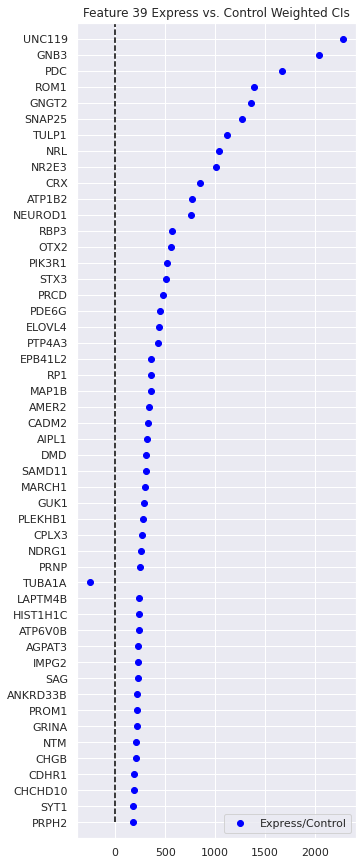

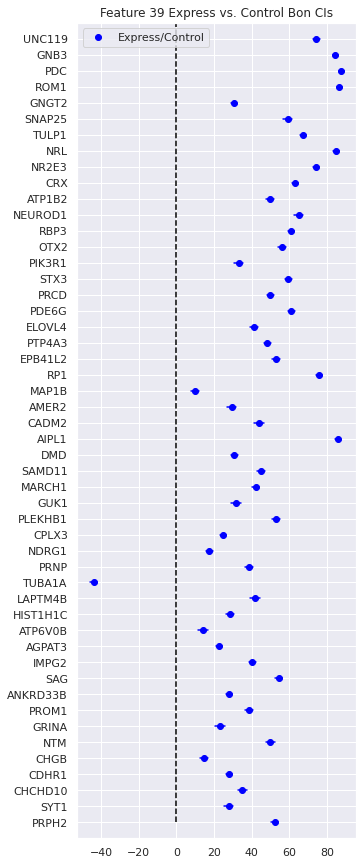

In [15]:
plt.rcParams['figure.figsize']= [5, 15]
scProject.viz.rankedByWeightedCIViz(driversExpressControl, 'Express/Control', "Feature 39 Express vs. Control Weighted CIs", "latentspace39/Expressvs.ControlWCIPlot.pdf",
                                    "Feature 39 Express vs. Control Bon CIs", "latentspace39/Evs.ControlBCIPlot.pdf")

C1 is dense
C2 is dense
(1877, 1) (1877, 3)


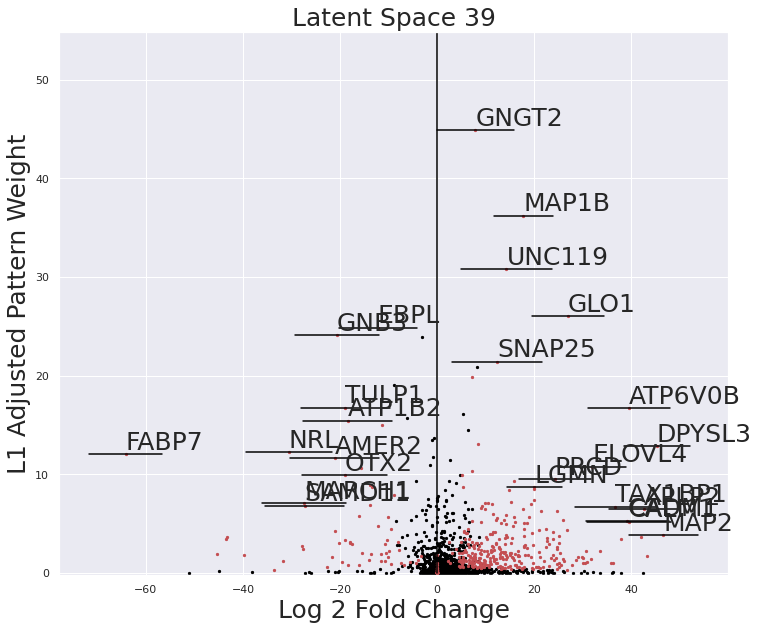

In [16]:
cones = dataset_filtered[(dataset_filtered.obs['umap2_CellType'] == 'Cones')].copy()

filtMatureCones = (((cones.obs['age'] == '42_Day') | 
                  (cones.obs['age'] == '24_Day') |
                  (cones.obs['age'] == 'Adult')  |
                  (cones.obs['age'] == '30_Day') |
                  (cones.obs['age'] == '59_Day') |
                  (cones.obs['age'] == 'Hpnd8')))


matureCones = cones[filtMatureCones].copy()
immatureCones = cones[(~filtMatureCones)].copy()

matureCones.X = np.log2(matureCones.X + 1e-30)
immatureCones.X = np.log2(immatureCones.X + 1e-30)
plt.rcParams['figure.figsize']= [12, 10]

drivers = scProject.stats.projectionDriver(patterns_filtered, matureCones, immatureCones, .9999999999, 'gene_short_name', patternNum, display=True,
                                          num_annotated=25, path="latentspace"+ str(patternNum) + "/WCIsCones.pdf", pointSize=5)


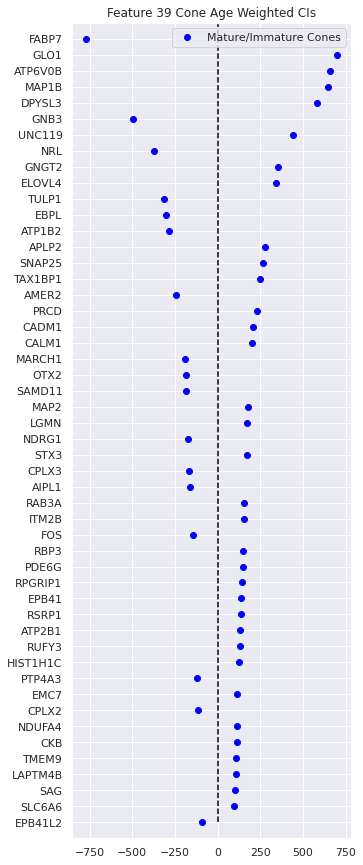

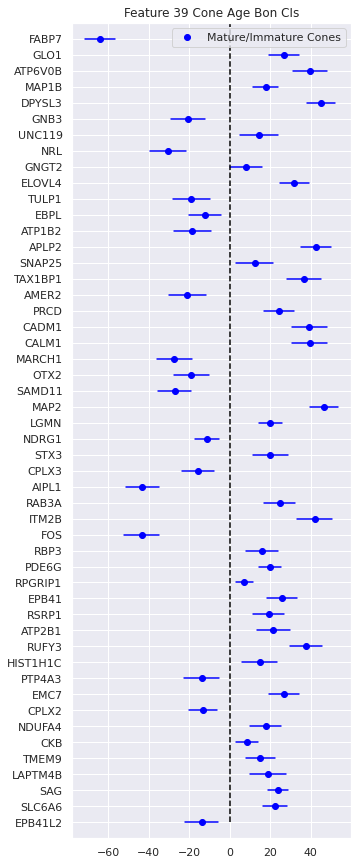

In [17]:
plt.rcParams['figure.figsize']= [5, 15]
scProject.viz.rankedByWeightedCIViz(drivers, 'Mature/Immature Cones', "Feature 39 Cone Age Weighted CIs", "latentspace39/ConeAgeWCIPlot.pdf",
                                    "Feature 39 Cone Age Bon CIs", "latentspace39/ConeAgeBCIPlot.pdf")

In [18]:
mapper = {'Hgw' : 'Gestational',
        '30_': 'early retinal organoids',
        '42_' : 'early retinal organoids',
        '59_' : 'early retinal organoids'}
condensed = [mapper.get(i[0 : 3], i) for i in cones.obs['age']]
cones.obs['age_condensed'] = condensed
plt.rcParams['figure.figsize']= [12, 15]
scProject.viz.UMAP_Viz(cones, 'H01UMAP', 'age_condensed', pointSize=.01,
                        path="/home/abaraban/conda_env/latentspace"+ str(patternNum) + "/"+str(patternNum)+"UMAPCones.pdf", display=False, colorScheme='colorblind')

['early retinal organoids' 'Adult' 'Gestational' 'Hpnd8']


In [19]:
plt.rcParams['figure.figsize']= [12, 10]
scProject.viz.featurePlots(cones, [patternNum], 'H01', 'H01UMAP', obsColumn='age_condensed', pointSize=.01,
                           path="/home/abaraban/conda_env/latentspace"+ str(patternNum) + "/conesfeaturePlot", display=False, clip=99)

/home/abaraban/anaconda3/envs/scProjections/lib/python3.7/site-packages/scProject/viz.py:232: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  colors.set_under(zeroColor)


Number of nonzero cells 5852


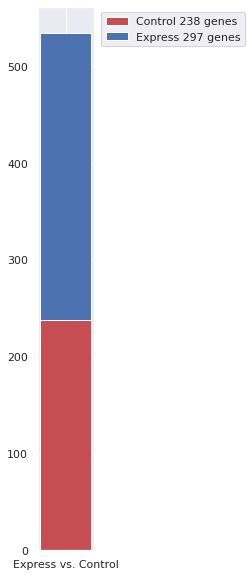

In [20]:
plt.rcParams['figure.figsize']= [1, 10]
x = ['Express vs. Control']
y1 = [len(drivers[0][drivers[0]['Low'] < 0].index)]
y2 = [len(drivers[0][drivers[0]['Low'] > 0].index)]
plt.bar(x, y1, color='r', label='Control ' + str(y1[0]) + ' genes')
plt.bar(x, y2, bottom=y1, color='b', label='Express ' + str(y2[0]) + ' genes')
plt.legend(bbox_to_anchor=(1.04,1))
plt.savefig('latentspace39/stackedConeMaturation.pdf', bbox_inches='tight')
plt.show()
